# Données de l’OFSP sur le covid

L’OFSP actualise encore chaque semaine des fichiers sur le covid, téléchargeables depuis [cette page](https://www.covid19.admin.ch/en/overview). On va se plonger dans celui des cas.

In [25]:
import pandas as pd

# matplotlib permet de générer des graphiques
import matplotlib.pyplot as plt

# on affiche les graphiques dans le notebook directement
%matplotlib inline

In [26]:
df = pd.read_csv('data/COVID19Cases_geoRegion.csv')
df.head()

,geoRegion,datum,entries,sumTotal,timeframe_14d,timeframe_all,offset_last7d,sumTotal_last7d,offset_last14d,sumTotal_last14d,...,inzsum14d,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last
0,CH,2020-02-24,1,1,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,1,0,914
1,CH,2020-02-25,1,2,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,1,0,914
2,CH,2020-02-26,10,12,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914
3,CH,2020-02-27,10,22,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914
4,CH,2020-02-28,10,32,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914


## Sélectionner les lignes de tant à tant

En Python, on peut découper une liste pour extraire les éléments de tel à tel index.

Exemple:

In [27]:
maliste = ["un", "deux", "trois", "quatre", "cinq", "six"]

In [28]:
# Du 2e au 4e élément – mais comme toujours, la numérotation commence à zéro
maliste[1:4]

['deux', 'trois', 'quatre']

In [29]:
# Elements à partir du 3ème
maliste[2:]

['trois', 'quatre', 'cinq', 'six']

In [30]:
# Trois derniers éléments
maliste[-3:]

['quatre', 'cinq', 'six']

### Dans Pandas
On peut faire pareil pour les lignes de notre tableau

In [31]:
# Index 5 et 6
df[5:7]

,geoRegion,datum,entries,sumTotal,timeframe_14d,timeframe_all,offset_last7d,sumTotal_last7d,offset_last14d,sumTotal_last14d,...,inzsum14d,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last
5,CH,2020-02-29,13,45,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,13,0,914
6,CH,2020-03-01,12,57,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,12,0,914


In [32]:
# Les deux dernières lignes
df[-2:]

,geoRegion,datum,entries,sumTotal,timeframe_14d,timeframe_all,offset_last7d,sumTotal_last7d,offset_last14d,sumTotal_last14d,...,inzsum14d,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last
30245,ZH,2022-12-31,94,786335,False,True,786985,0,786783,0,...,206.50,-83.0,-5.31,COVID19Cases,NaN,2023-01-24_06-03-16,day,93,1,165
30246,ZH,2023-01-01,36,786371,False,True,786985,0,786783,0,...,201.07,-78.0,-4.98,COVID19Cases,NaN,2023-01-24_06-03-16,day,36,0,165


In [35]:
df["datum"].value_counts()

datum
2020-02-24    29
2022-01-09    29
2022-01-11    29
2022-01-12    29
2022-01-13    29
              ..
2021-02-10    29
2021-02-11    29
2021-02-12    29
2021-02-13    29
2023-01-01    29
Name: count, Length: 1043, dtype: int64

## Sélectionner une région
On voit que le fichier de données contient 29 fois chaque date. En fait, pour chaque date, il donne les cas dans les 26 cantons + la Suisse entière + le Liechtenstein + Suisse et Liechtenstein. Pour faire simple, dans ce notebook, on va conserver uniquement la Suisse. Ça nous laisse quand même un millier de lignes de données.

Et on va remplacer «entries» par «Nombre de cas».

In [45]:
df = df[df["geoRegion"] == "CH"].copy()
df.rename(columns={"entries": "Nombre de cas"}, inplace=True)
df.shape

(1043, 37)

## Une date comme index
On indique à Python de construire l’index à partir de la colonne **datum**:

In [46]:
# D’abord, on convertit la date
df["date"] = pd.to_datetime(df["datum"])

In [47]:
# Ensuite, on en fait notre index. N’oubliez pas inplace=True!
df.set_index(df["date"], inplace=True)

In [48]:
# Et voilà à quoi ça ressemble!
df.head()

,geoRegion,datum,Nombre de cas,sumTotal,timeframe_14d,timeframe_all,offset_last7d,sumTotal_last7d,offset_last14d,sumTotal_last14d,...,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last,date
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,CH,2020-02-24,1,1,False,True,4385008,0,4383801,0,...,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,1,0,914,2020-02-24
2020-02-25,CH,2020-02-25,1,2,False,True,4385008,0,4383801,0,...,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,1,0,914,2020-02-25
2020-02-26,CH,2020-02-26,10,12,False,True,4385008,0,4383801,0,...,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914,2020-02-26
2020-02-27,CH,2020-02-27,10,22,False,True,4385008,0,4383801,0,...,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914,2020-02-27
2020-02-28,CH,2020-02-28,10,32,False,True,4385008,0,4383801,0,...,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914,2020-02-28


## Sélectionner par date
C’est le même principe que plus haut!

In [49]:
# On peut cibler des données de telle à telle date, puis faire la somme
df["2020-02-28":"2020-03-16"]["Nombre de cas"].sum()

3737

In [50]:
# Ou prendre les données dès / jusqu’à telle date
df["2020-03-16":]["Nombre de cas"].sum()

4378553

In [51]:
# Ou encore prendre un mois entier, avec .loc
# J’ai pris 5 lignes au hasard pour ne pas prendre tout votre écran
df.loc["2020-03"].sample(5)

,geoRegion,datum,Nombre de cas,sumTotal,timeframe_14d,timeframe_all,offset_last7d,sumTotal_last7d,offset_last14d,sumTotal_last14d,...,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last,date
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,CH,2020-03-02,30,87,False,True,4385008,0,4383801,0,...,29.0,0.33,COVID19Cases,NaN,2023-01-24_06-03-16,day,30,0,914,2020-03-02
2020-03-03,CH,2020-03-03,33,120,False,True,4385008,0,4383801,0,...,32.0,0.37,COVID19Cases,NaN,2023-01-24_06-03-16,day,33,0,914,2020-03-03
2020-03-23,CH,2020-03-23,1462,10719,False,True,4385008,0,4383801,0,...,402.0,4.60,COVID19Cases,NaN,2023-01-24_06-03-16,day,1462,0,914,2020-03-23
2020-03-14,CH,2020-03-14,417,2373,False,True,4385008,0,4383801,0,...,368.0,4.21,COVID19Cases,NaN,2023-01-24_06-03-16,day,417,0,914,2020-03-14
2020-03-06,CH,2020-03-06,73,316,False,True,4385008,0,4383801,0,...,63.0,0.72,COVID19Cases,NaN,2023-01-24_06-03-16,day,73,0,914,2020-03-06


In [52]:
df[:"2020-09-02"].tail()

,geoRegion,datum,Nombre de cas,sumTotal,timeframe_14d,timeframe_all,offset_last7d,sumTotal_last7d,offset_last14d,sumTotal_last14d,...,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last,date
date,,,,,,,,,,,,,,,,,,,,,
2020-08-29,CH,2020-08-29,215,42097,False,True,4385008,0,4383801,0,...,23.0,0.27,COVID19Cases,NaN,2023-01-24_06-03-16,day,215,0,914,2020-08-29
2020-08-30,CH,2020-08-30,144,42241,False,True,4385008,0,4383801,0,...,8.0,0.09,COVID19Cases,NaN,2023-01-24_06-03-16,day,144,0,914,2020-08-30
2020-08-31,CH,2020-08-31,347,42588,False,True,4385008,0,4383801,0,...,43.0,0.49,COVID19Cases,NaN,2023-01-24_06-03-16,day,347,0,914,2020-08-31
2020-09-01,CH,2020-09-01,364,42952,False,True,4385008,0,4383801,0,...,26.0,0.30,COVID19Cases,NaN,2023-01-24_06-03-16,day,364,0,914,2020-09-01
2020-09-02,CH,2020-09-02,417,43369,False,True,4385008,0,4383801,0,...,55.0,0.63,COVID19Cases,NaN,2023-01-24_06-03-16,day,417,0,914,2020-09-02


# Passons aux graphiques!

Matplotlib est un module Python très puissant pour les graphiques.

Mais il est aussi très «bas niveau». Vous pouvez tout faire, mais vous devez un peu tout lui dire.

Google et StackOverflow sont vos amis...

In [53]:
plt.style.use("fivethirtyeight")

<Axes: xlabel='date'>

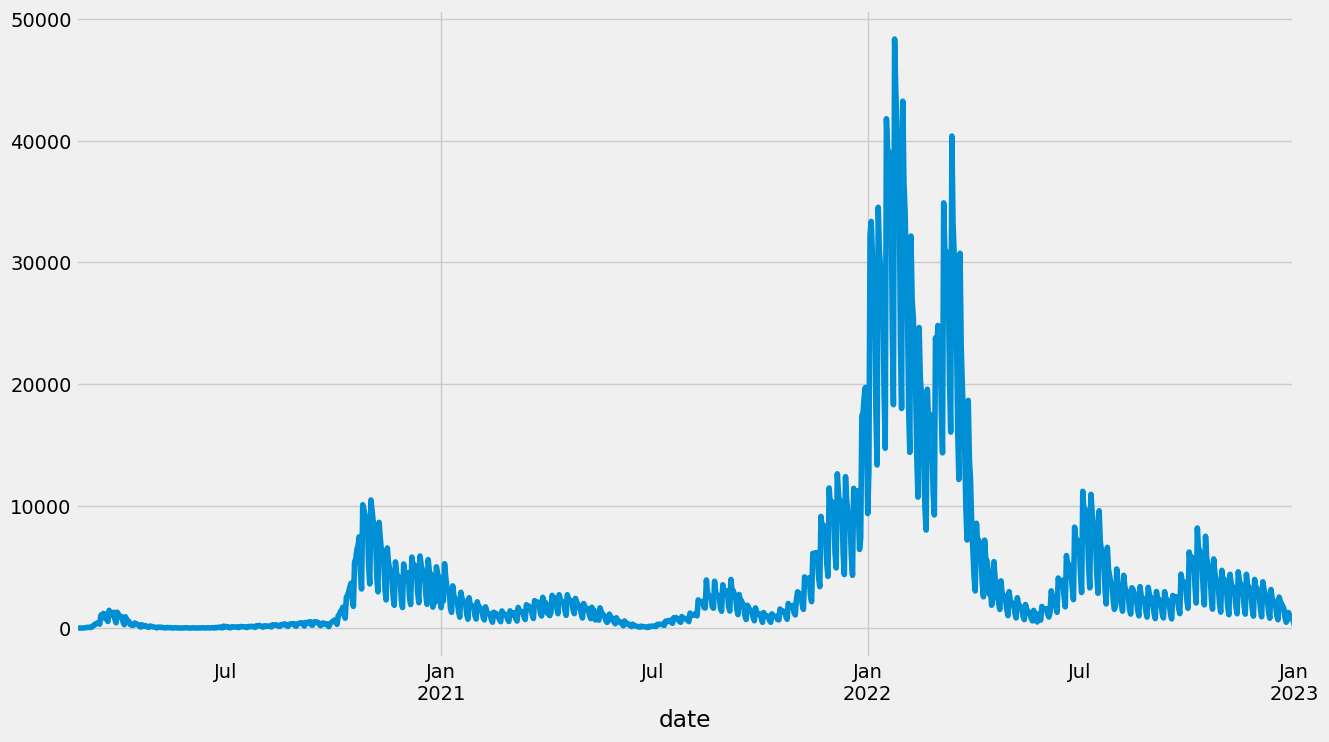

In [54]:
# Le nombre de cas quotidien
df["Nombre de cas"].plot(figsize=(14, 8))

<Axes: >

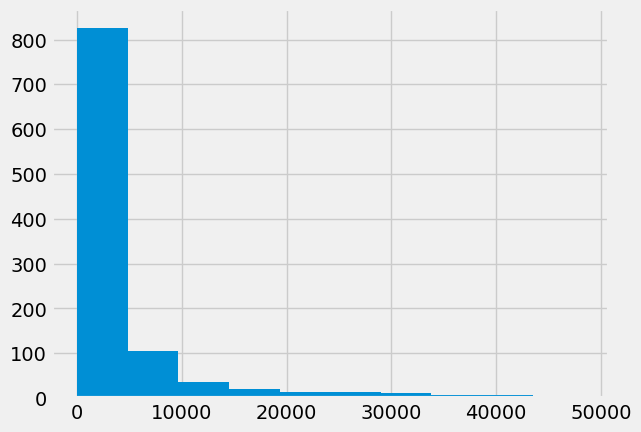

In [55]:
# Un histogramme, pour voir comment les données sont distribuées
df["Nombre de cas"].hist(bins=10)

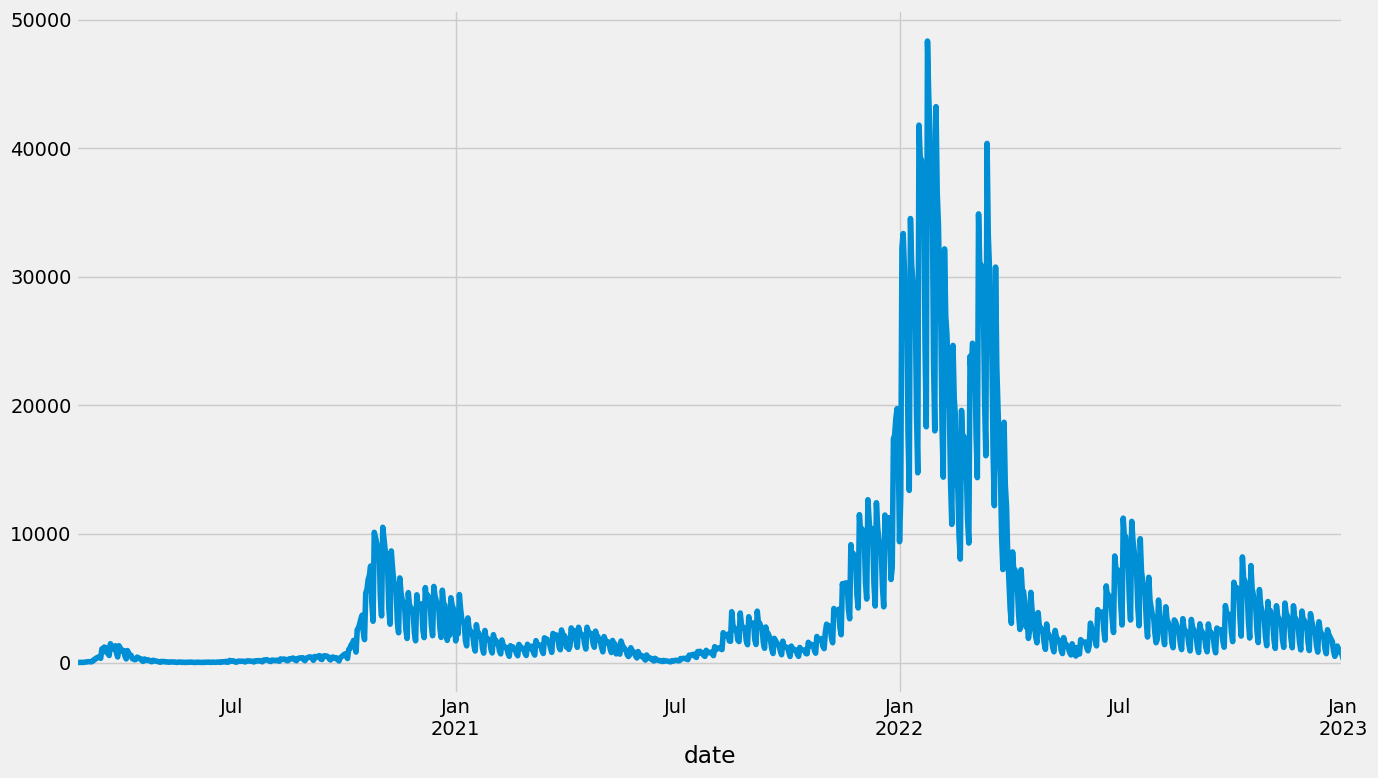

In [56]:
# Et si on veut exporter notre graphique en PDF, pour le retravailler?
df["Nombre de cas"].plot(kind="line", figsize=(14, 8))
plt.tight_layout()
plt.savefig("export_graphique.pdf")

## Moyenne mobile = rolling average
Les données du covid sont très fortement influencées par les jours de la semaine, avec des creux chaque week-end.

Elles prennent plus de sens soit quand on les regroupe par semaine, soit avec une moyenne mobile sur 7 jours:

<Axes: xlabel='date'>

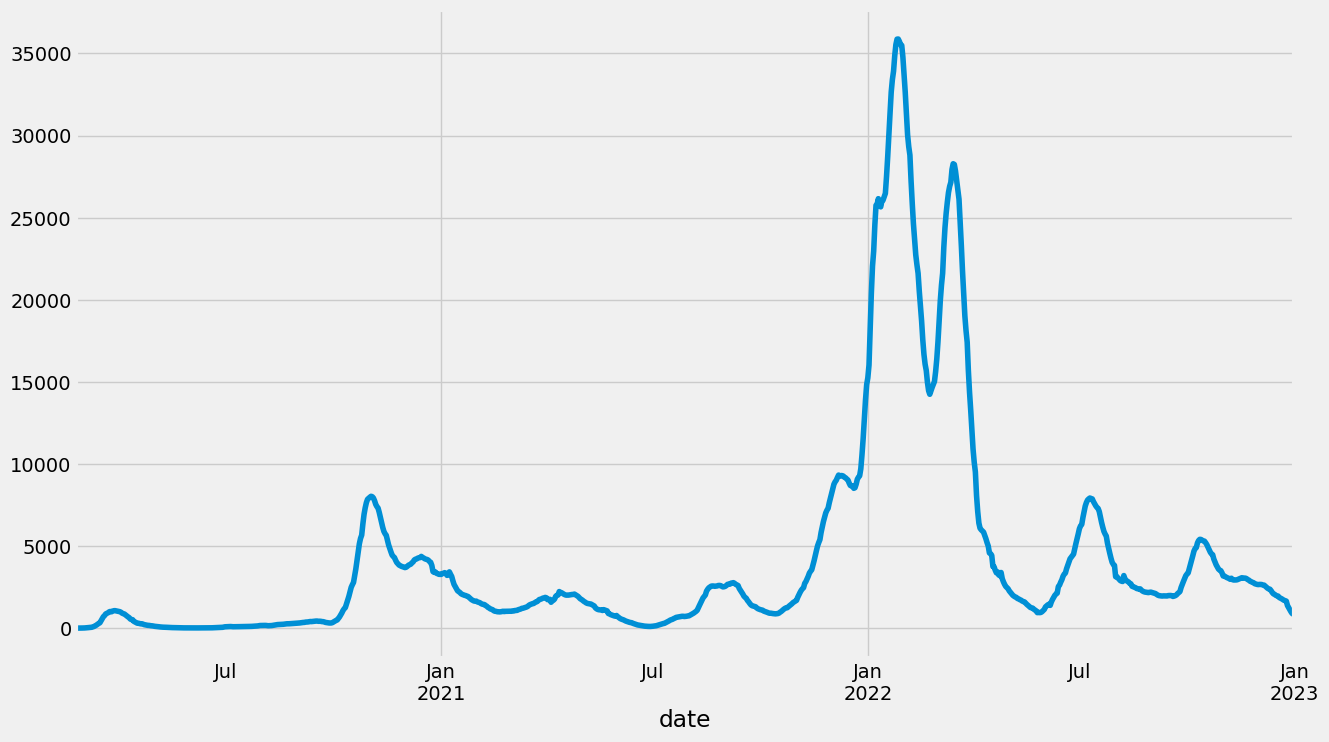

In [57]:
df["Nombre de cas"].rolling("7d").mean().plot(figsize=(14, 8))

In [66]:
# Calculer la somme hebdomadaire.
# Comme nos semaines commencent le lundi, on précise "W-Mon" par opposition à la semaine américaine qui commence le dimanche: "W".
df["Nombre de cas"].resample("W-Mon", label="left").sum()

date
2020-02-17        1
2020-02-24       86
2020-03-02      538
2020-03-09     3134
2020-03-16     6960
              ...  
2022-11-28    18389
2022-12-05    15959
2022-12-12    13035
2022-12-19     9651
2022-12-26     5002
Freq: W-MON, Name: Nombre de cas, Length: 150, dtype: int64

## Exercice

Pouvez-vous compléter ces données avec le nombre de tests par jour, également publié par l’OFSP [sur cette page](https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html)?

Et lui appliquer également une moyenne mobile?

## Pour terminer

On peut exporter le résultat tout joli, avec moyenne mobile, vers datawrapper.

Sélectionnez les colonnes et les dates qui vous intéressent, puis essayez un `to_excel('nom-du-fichier.xlsx')` ou `to_csv('nom-du-fichier.csv')`...